In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2, TStyle, THStack
import ROOT
import numpy as np
import awkward as awk
import uproot
import pandas as pd


Welcome to JupyROOT 6.22/06


In [2]:
!pwd

/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis


In [3]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.035)
gStyle.SetTitleYOffset(1.55)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

biglatex=TLatex()
biglatex.SetTextSize(0.045)

smalllatex=TLatex()
smalllatex.SetTextSize(0.022)

In [3]:
#d = RDataFrame("tree_MC","~/workdir/MCLundAnalysis/OutputFiles/Lund_8_19/file1.root")
#d = RDataFrame("tree_MC", "~/workdir/MCLundAnalysis/OutputFiles/AffinityFiles/Files_9_16/file1.root")
# d = RDataFrame("tree_MC_plus", "~/workdir/MCLundAnalysis/OutputFiles/Slurm/Oct_27/file_*.root")
#Below uses calculated q = init_electron - electorn.lv
d1 = RDataFrame("tree_MC", "~/workdir/MCLundAnalysis/OutputFiles/Slurm/BoxFiles/Nov17/file_*.root")
# d1 = RDataFrame("tree_MC_minus", "~/workdir/MCLundAnalysis/OutputFiles/Slurm/Oct_27/file_*.root")
# d1 = RDataFrame("tree_MC", "~/workdir/MCLundAnalysis/OutputFiles/Slurm/Jan_27/run_1/file_*.root")
#Below uses the MC Data
d = RDataFrame("tree_MC", "~/workdir/MCLundAnalysis/OutputFiles/Slurm/April_17/Run_2/file_*.root")
# d1 = RDataFrame("tree_postprocess","/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/MC/rowan_pipluspiminus/run*.root")
# d = RDataFrame("tree_MC_plus", "../OutputFiles/Test_10_27/file3.root")

In [5]:
# up = uproot.open("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/MC/rowan_pipluspiminus/merged_run.root")

In [6]:
# up.keys()

In [4]:
print(d.GetColumnNames())

{ "z", "x", "pT", "Q2", "Q2calc", "R0", "R1", "R1lab", "R1breit", "R1plus", "R2", "Mh", "q_TdivQ", "xF", "R0check", "R1num", "R1denom", "R1num_Breit", "R1denom_Breit", "R1num_lab", "R1denom_lab" }


In [5]:
h2d = d.Histo2D(("h",";Q2 ;R1",1000,0,10,1000,-5,5),"Q2","R1max")
h = d.Histo1D(("h",";qDivQ ;Counts",1000,0,5),"q_TdivQ")
h1 = d.Histo1D(("h1",";x ;Counts", 1000, 0, 1), "x")
h2 = d.Histo1D(("h2",";z_h ;Counts", 1000, 0, 1), "z")
h3 = d.Histo1D(("h3",";pT ;Counts", 1000, 0, 1), "pT")
h4 = d.Histo1D(("h4",";Q2 ;Counts", 1000, 0, 8), "Q2")
# h4.GetValue().Divide(h4b.GetValue())
h5 = d.Histo1D(("h5",";Mh ;Counts", 1000, 0, 2), "Mh")
# h6 = d.Histo1D(("h6",";Mx ;Counts", 1000, 0, 3), "Mx")
h6 = d.Histo1D(("h6",";R0 MC ;Counts", 1000, -0.5, 1), "R0max")
h7 = d.Histo1D(("h7",";R1 MC ;Counts", 1000, -5, 5), "R1max")
h8 = d.Histo1D(("h8",";R2 MC ;Counts", 1000, -0.5, 1), "R2max")


TypeError: Template method resolution failed:
  none of the 2 overloaded methods succeeded. Full details:
  ROOT::RDF::RResultPtr<TH2D> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Histo2D(const ROOT::RDF::TH2DModel& model, experimental::basic_string_view<char,char_traits<char> > v1Name, experimental::basic_string_view<char,char_traits<char> > v2Name, experimental::basic_string_view<char,char_traits<char> > wName) =>
    TypeError: takes at least 4 arguments (3 given)
  ROOT::RDF::RResultPtr<TH2D> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Histo2D(const ROOT::RDF::TH2DModel& model, experimental::basic_string_view<char,char_traits<char> > v1Name = "", experimental::basic_string_view<char,char_traits<char> > v2Name = "") =>
    runtime_error: Unknown column: R1max
  Failed to instantiate "Histo2D(ROOT::RDF::TH2DModel*,std::string,std::string)"

In [ ]:
xFd = d.Histo1D(("xFd", "xF Histogram;xF ;Counts", 1000, -5, 5), "xF")
c = TCanvas("c","c",400,400)
c.Draw()
xFd.Draw("histo")

In [9]:
#Histogams for plotting R1 values
h = d.Histo1D(("h",";R1gN ;Counts",1000,-5,5),"R1")
h1 = d.Histo1D(("h1",";R1breit ;Counts", 1000, -5, 5), "R1breit")
h2 = d.Histo1D(("h2",";R1lab ;Counts", 1000, -5, 5), "R1lab")
h3 = d.Histo1D(("h3",";R1num gN ;Counts", 1000, -5, 5), "R1num")
h6 = d.Histo1D(("h4",";R1denom gN ;Counts", 1000, -5, 5), "R1denom")
h5 = d.Histo1D(("h5",";R1num lab ;Counts", 1000, -5, 5), "R1num_lab")
# h6 = d.Histo1D(("h6",";Mx ;Counts", 1000, 0, 3), "Mx")
h8 = d.Histo1D(("h6",";R1denom lab ;Counts", 1000, -5, 5), "R1denom_lab")
h4 = d.Histo1D(("h7",";R1num Breit;Counts", 1000, -5, 5), "R1num_Breit")
h7 = d.Histo1D(("h8",";R1denom Breit;Counts", 1000, -5, 5),"R1denom_Breit")


In [13]:
h2d = d.Histo2D(("h",";Q2 ;R1",1000,0,10,1000,-5,5),"Q2","R1breit")

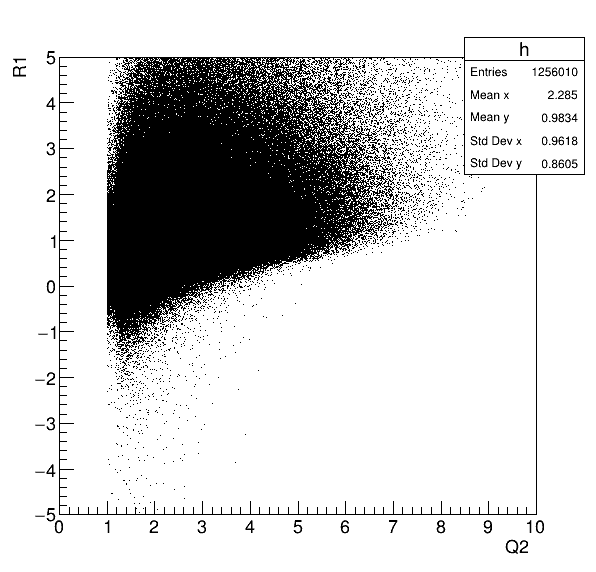

In [14]:
c = TCanvas("c","c",600,600)
h2d.Draw("histo")
c.Draw()

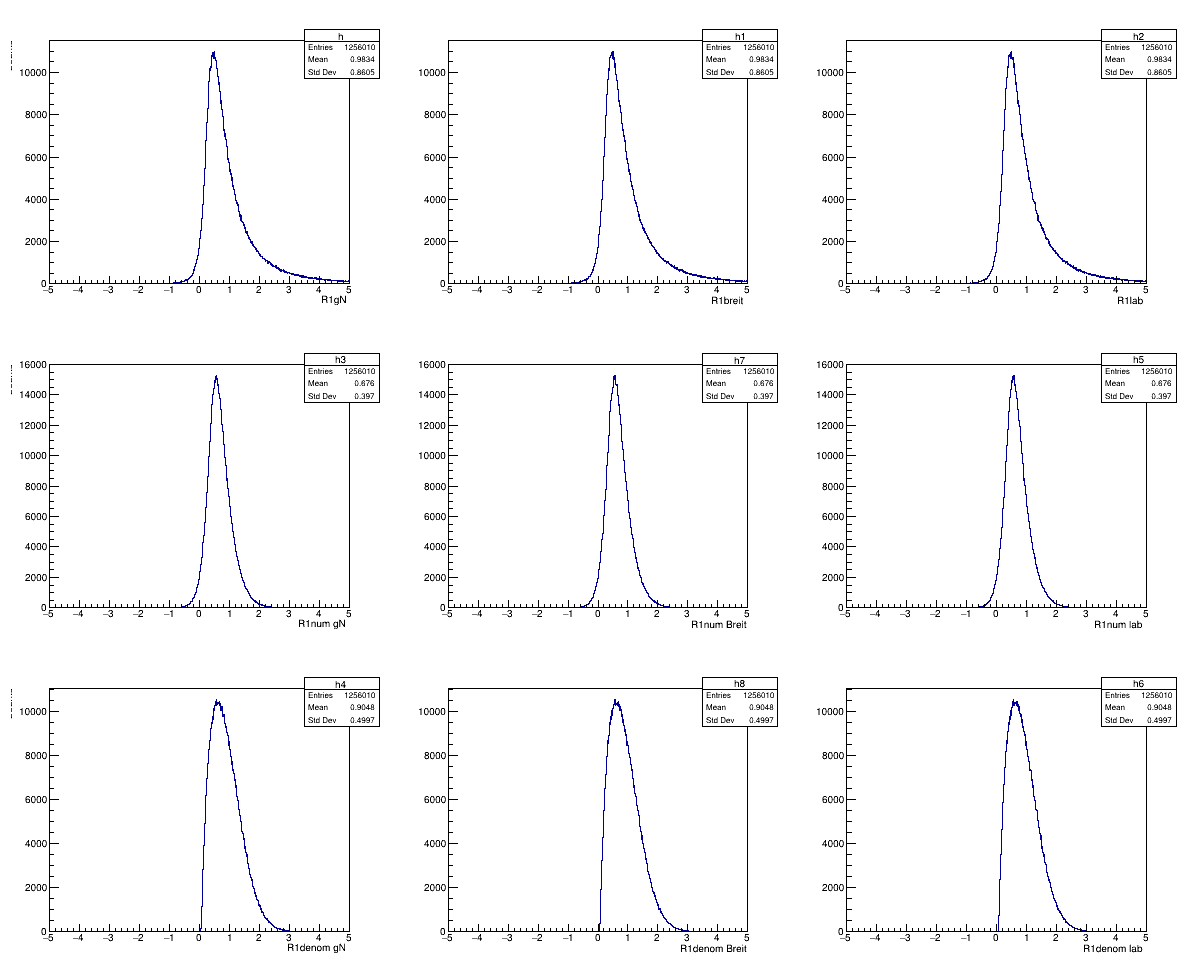

In [10]:
#Using MC data for q
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
# harray = np.array([h1,h2,h3,h4,h5])

c.cd(1)
h.Draw("histo")
c.cd(2)
h1.Draw("histo")
c.cd(3)
h2.Draw("histo")
c.cd(4)
h3.Draw("histo")
c.cd(5)
h4.Draw("histo")
c.cd(6)
h5.Draw("histo")
c.cd(7)
h6.Draw("histo")
c.cd(8)
h7.Draw("histo")
c.cd(9)
h8.Draw("histo")
c.Draw()
c.Print("histosbox.png")

In [25]:
 g = d.Histo1D(("h",";kix ;Counts",1000,-3,3),"kix")
g1 = d.Histo1D(("h1",";kiy ;Counts", 1000, -3, 3), "kiy")
g2 = d.Histo1D(("h2",";kiz ;Counts", 1000, -3, 3), "kiz")
g3 = d.Histo1D(("h3",";kiE ;Counts", 1000, -3, 3), "kiE")
g4 = d.Histo1D(("h4",";kfx ;Counts", 1000, -3, 3), "kfx")
g5 = d.Histo1D(("h5",";kfy ;Counts", 1000, -3, 3), "kfy")
# h6 = d.Histo1D(("h6",";Mx ;Counts", 1000, 0, 3), "Mx")
g6 = d.Histo1D(("h6",";kfz ;Counts", 1000, -3, 3), "kfz")
g7 = d.Histo1D(("h7",";kfE ;Counts", 1000, -3, 3), "kfE")
g8 = d.Histo1D(("h8",";ki2 ;Counts", 1000, -3, 3), "ki2")


In [26]:
 f = d.Histo1D(("h",";ki2 ;Counts",1000,-0.1,0.1),"ki2")
f1 = d.Histo1D(("h1",";kf2 ;Counts", 1000, -1, 1), "kf2")
f2 = d.Histo1D(("h2",";deltak2 ;Counts", 1000, -1, 1), "deltak2")
f3 = d.Histo1D(("h3",";qx ;Counts", 1000, -3, 3), "qx")
f4 = d.Histo1D(("h4",";qy ;Counts", 1000, -3, 3), "qy")
f5 = d.Histo1D(("h5",";qz ;Counts", 1000, 0, 10), "qz")
# h6 = d.Histo1D(("h6",";Mx ;Counts", 1000, 0, 3), "Mx")
f6 = d.Histo1D(("h6",";qE ;Counts", 1000, 0, 10), "qE")
f7 = d.Histo1D(("h7",";kTx ;Counts", 1000, -1, 1), "kTx")
f8 = d.Histo1D(("h8",";kTy ;Counts", 1000, -1, 1), "kTy")


In [27]:
 w = d.Histo1D(("h",";photonx ;Counts",1000,-3,3),"photonx")
w1 = d.Histo1D(("h1",";photony ;Counts", 1000, -3, 3), "photony")
w2 = d.Histo1D(("h2",";photonz ;Counts", 1000, 0, 12), "photonz")
w3 = d.Histo1D(("h3",";photonE ;Counts", 1000, 0, 12), "photonE")


In [42]:
#Using older data, q = electron - initial
hb = d1.Histo1D(("h",";qDivQ ;Counts",1000,0,5),"q_TdivQ")
h1b = d1.Histo1D(("h1",";x ;Counts", 1000, 0, 1), "x")
h2b = d1.Histo1D(("h2",";z_h ;Counts", 1000, 0, 1), "z")
h3b = d1.Histo1D(("h3",";pT ;Counts", 1000, 0, 1), "pT")
h4b = d1.Histo1D(("h4",";Q2 calc ;Counts", 1000, 0, 8), "Q2")
h5b = d1.Histo1D(("h5",";Mh calc ;Counts", 1000, 0, 2), "Mh")
# h6 = d.Histo1D(("h6",";Mx ;Counts", 1000, 0, 3), "Mx")
h6b = d1.Histo1D(("h6",";R0 calc ;Counts", 1000, -0.5, 1), "R0max")
h7b = d1.Histo1D(("h7",";R1 calc ;Counts", 1000, -3, 5), "R1max")
h8b = d1.Histo1D(("h8",";R2 calc ;Counts", 1000, -0.5, 1), "R2max")


In [43]:
# g = d1.Histo1D(("g",";x (Greg);Counts", 1000, 0, 1), "x")
# # g.SetFillColor(2)
# g1 = d1.Histo1D(("g1",";z_h ;Counts", 1000, 0, 1), "zh")
# g2 = d1.Histo1D(("g2",";pT ;Counts", 1000, 0, 1), "pt")
# g3 = d1.Histo1D(("g3",";Q2 (Greg);Counts", 1000, 0, 8), "Q2")
# # h5 = d1.Histo1D(("h5",";Mh ;Counts", 1000, 0, 2), "Mh")
# g4 = d1.Histo1D(("g4",";Mx ;Counts", 1000, 0, 3), "Mx")


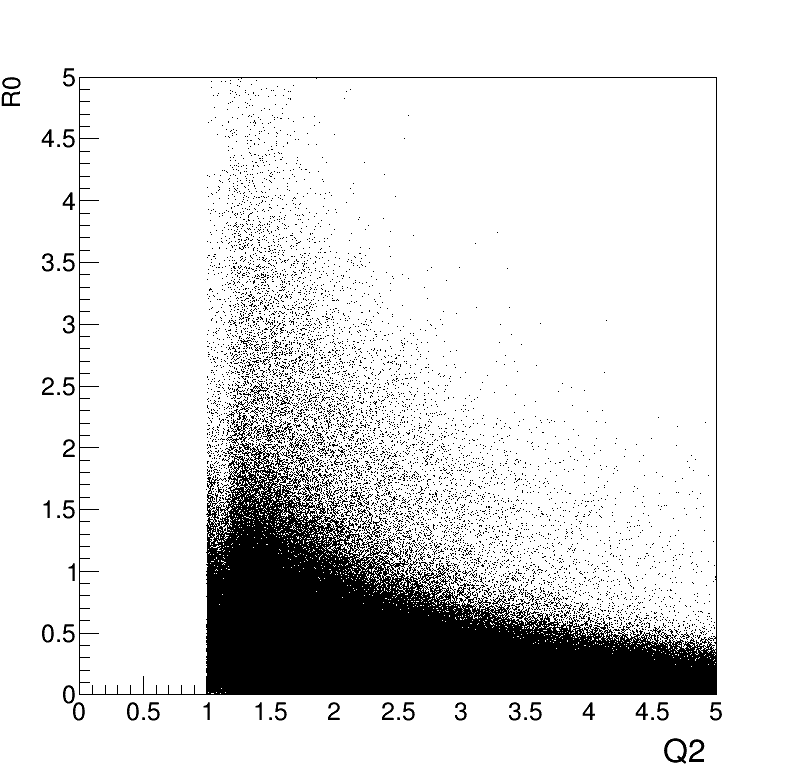

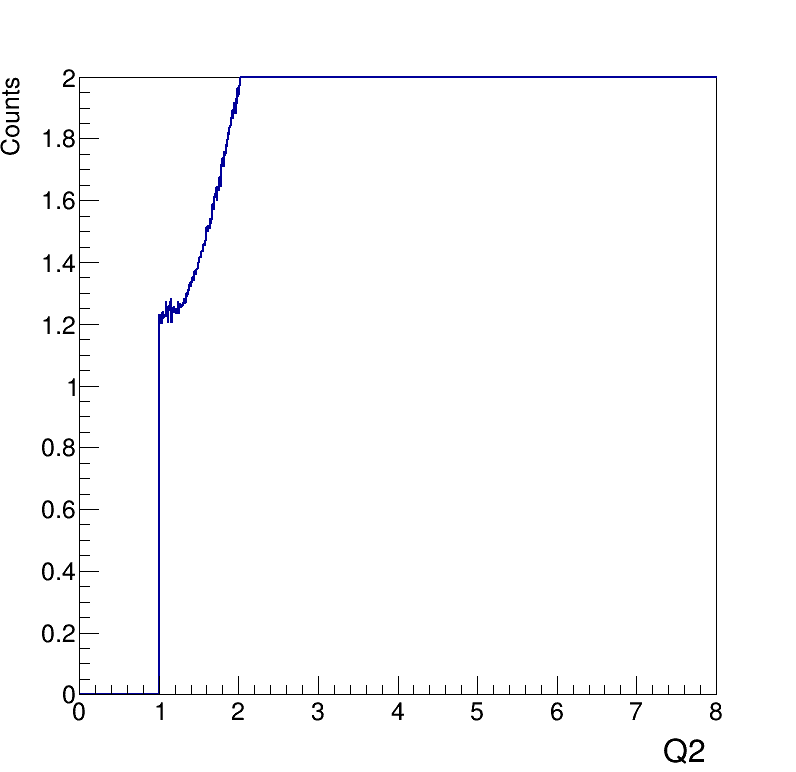

In [57]:
cx = TCanvas("c","c",800,800)
hx = d.Histo1D(("h",";R0 contributor: 0 = deltak 1 = ki 2 = kf; Counts", 1000, -1, 3), "R0check")
cx.Draw()
h4.GetYaxis().SetRangeUser(0,2)
h4.Draw("histo")

In [30]:
#Using calculated virtual photon momentum
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)

c.cd(1)
hb.Draw("histo")
c.cd(2)
h1b.Draw("histo")
c.cd(3)
h2b.Draw("histo")
c.cd(4)
h3b.Draw("histo")
c.cd(5)
h4b.Draw("histo")
c.cd(6)
h5b.Draw("histo")
c.cd(7)
h6b.Draw("histo")
c.cd(8)
h7b.Draw("histo")
c.cd(9)
h8b.Draw("histo")
c.Draw()
# c.Print("histosbox.png")

NameError: name 'hb' is not defined

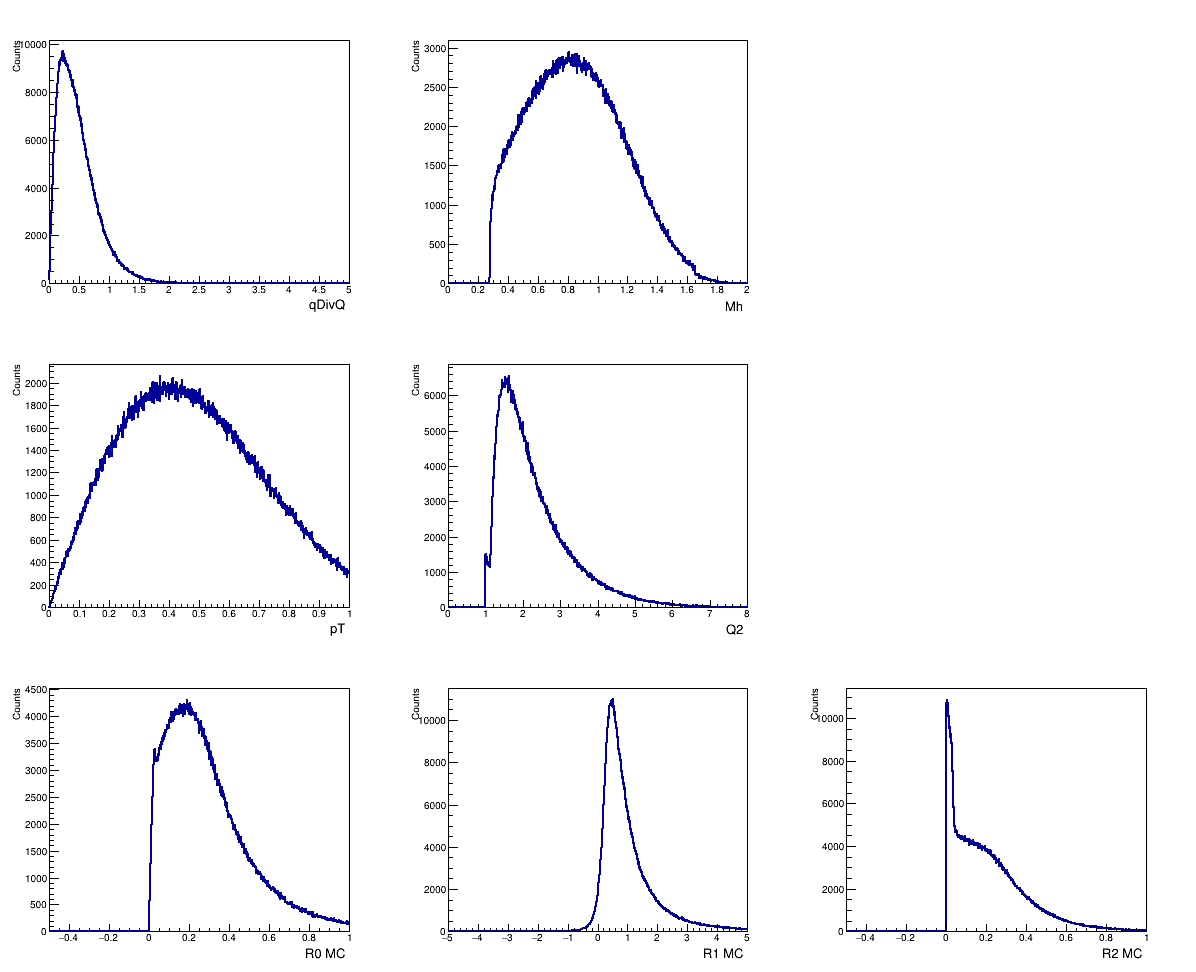

In [33]:
#Using MC data for q
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
# harray = np.array([h1,h2,h3,h4,h5])

c.cd(1)
h.Draw("histo")
c.cd(2)
h5.Draw("histo")
c.cd(3)
# h5b.Draw("histo")
c.cd(4)
h3.Draw("histo")
c.cd(5)
h4.Draw("histo")
c.cd(6)
# h4b.Draw("histo")
c.cd(7)
h6.Draw("histo")
c.cd(8)
h7.Draw("histo")
c.cd(9)
h8.Draw("histo")
c.Draw()
c.Print("histosbox.png")

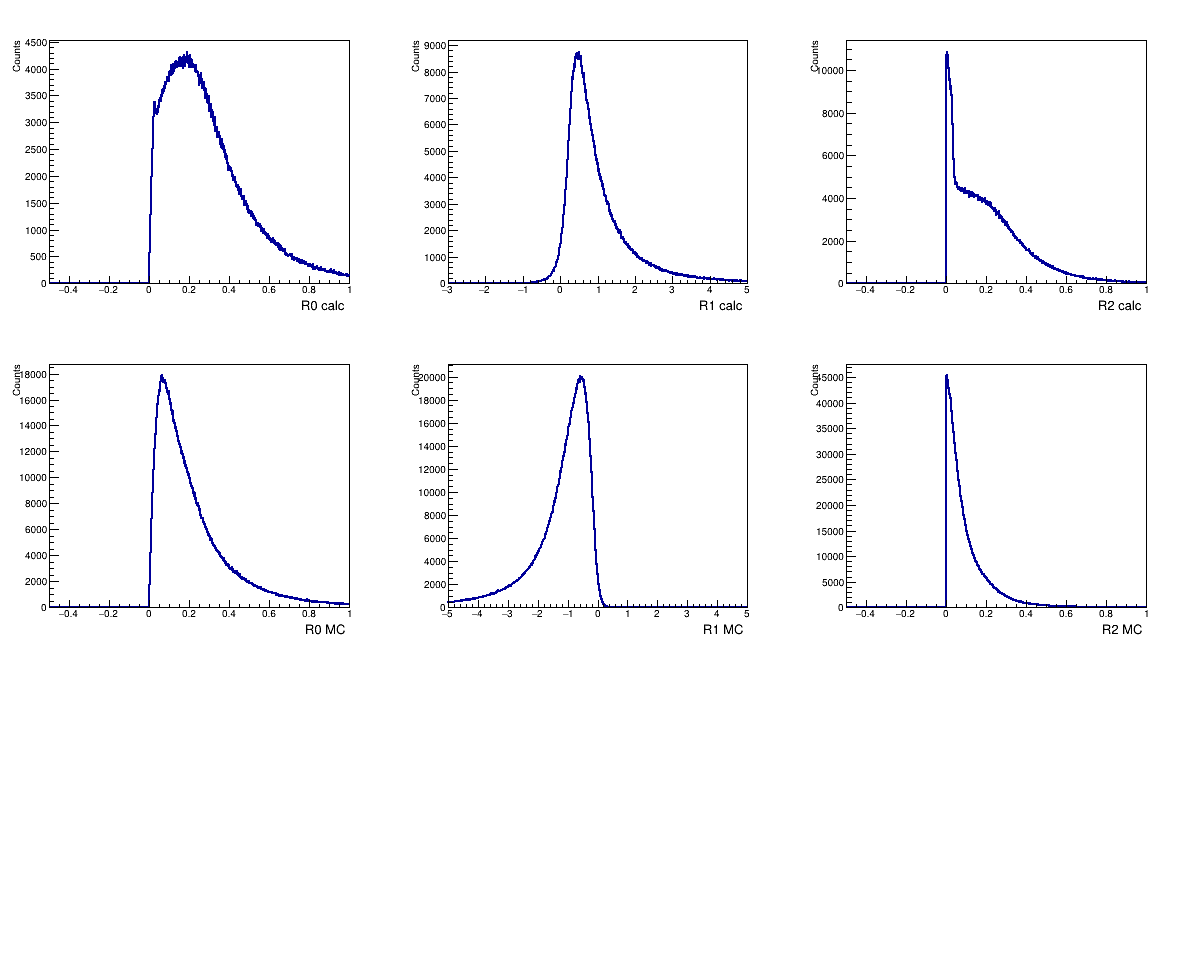

In [47]:
#R values for different q values
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
# harray = np.array([h1,h2,h3,h4,h5])

c.cd(1)
h6b.Draw("histo")
c.cd(2)
h7b.Draw("histo")
c.cd(3)
h8b.Draw("histo")
c.cd(4)
h6.Draw("histo")
c.cd(5)
h7.Draw("histo")
c.cd(6)
h8.Draw("histo")
c.Draw()

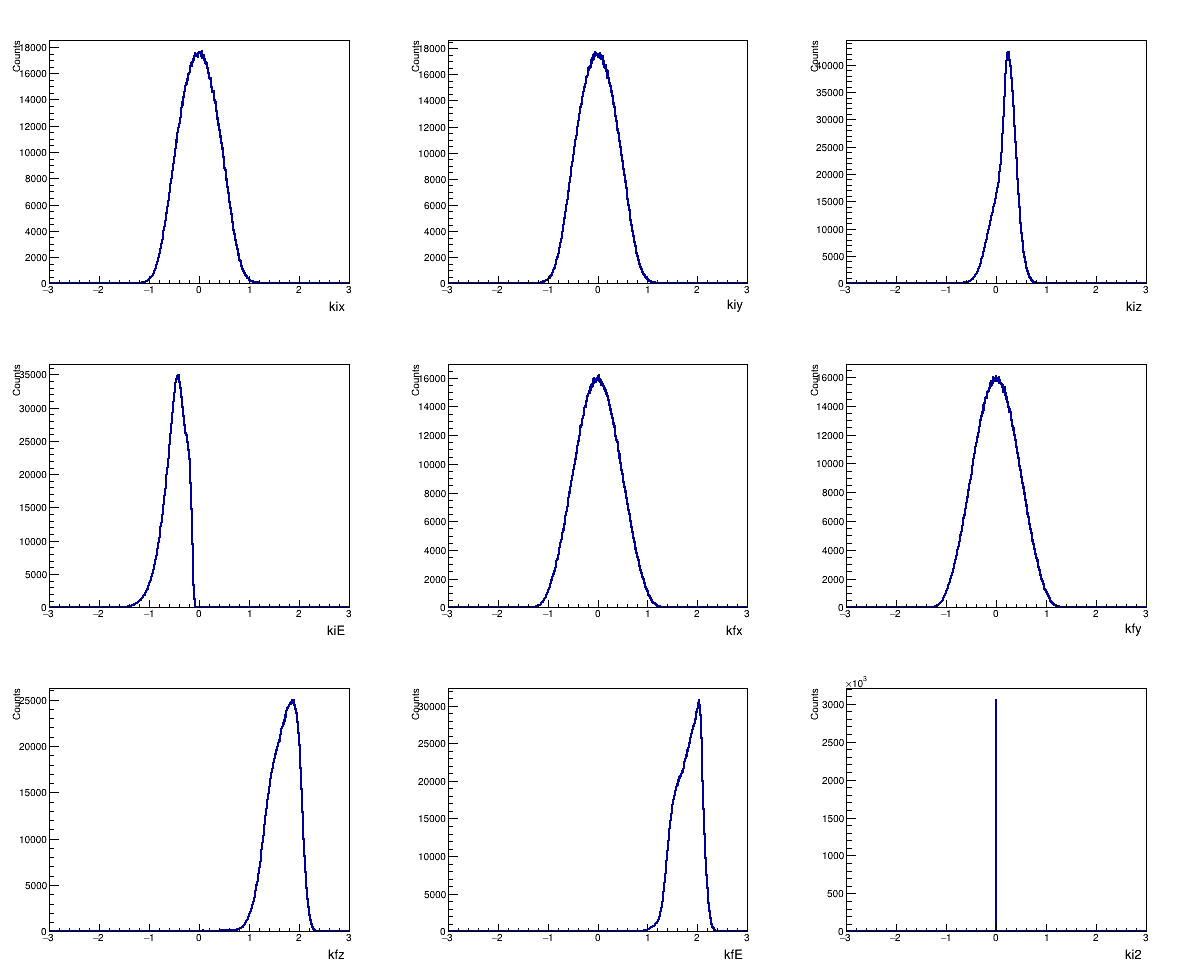

In [48]:
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
# harray = np.array([h1,h2,h3,h4,h5])

c.cd(1)
g.Draw("histo")
c.cd(2)
g1.Draw("histo")
c.cd(3)
g2.Draw("histo")
c.cd(4)
g3.Draw("histo")
c.cd(5)
g4.Draw("histo")
c.cd(6)
g5.Draw("histo")
c.cd(7)
g6.Draw("histo")
c.cd(8)
g7.Draw("histo")
c.cd(9)
g8.Draw("histo")
c.Draw()
c.Print("histosbox.png")

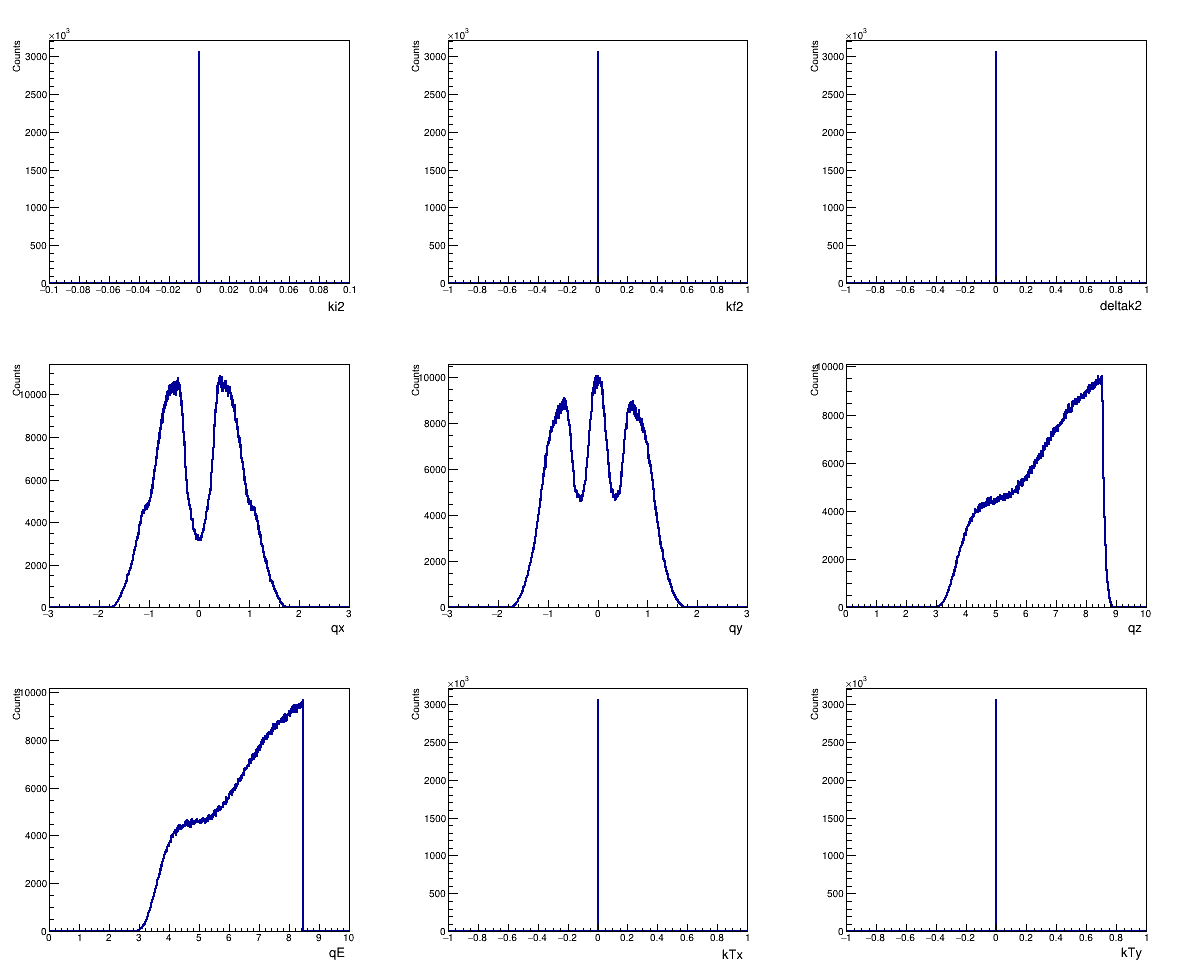

In [49]:
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
# harray = np.array([h1,h2,h3,h4,h5])

c.cd(1)
f.Draw("histo")
c.cd(2)
f1.Draw("histo")
c.cd(3)
f2.Draw("histo")
c.cd(4)
f3.Draw("histo")
c.cd(5)
f4.Draw("histo")
c.cd(6)
f5.Draw("histo")
c.cd(7)
f6.Draw("histo")
c.cd(8)
f7.Draw("histo")
c.cd(9)
f8.Draw("histo")
c.Draw()
c.Print("histosbox.png")

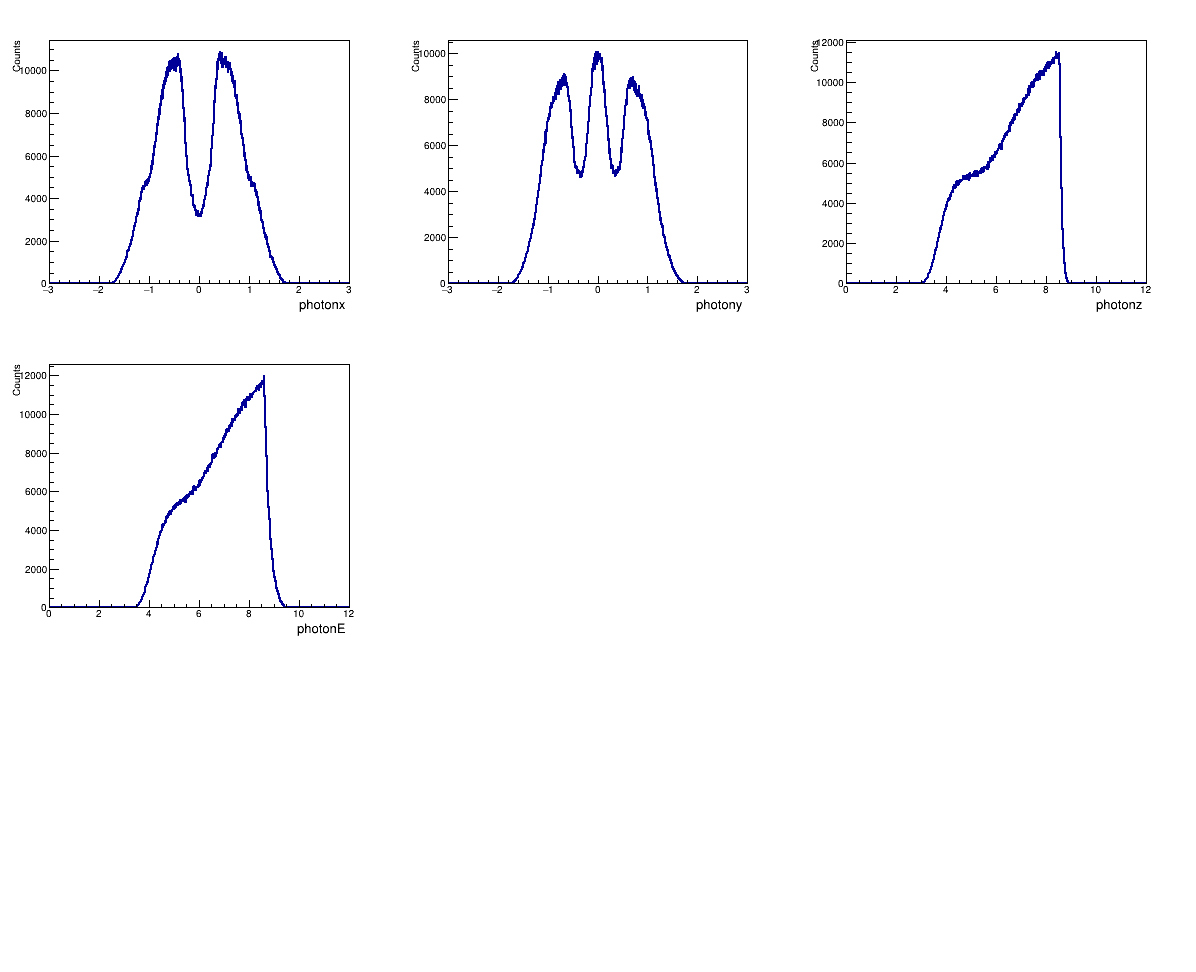

In [50]:
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
# harray = np.array([h1,h2,h3,h4,h5])

c.cd(1)
w.Draw("histo")
c.cd(2)
w1.Draw("histo")
c.cd(3)
w2.Draw("histo")
c.cd(4)
w3.Draw("histo")
c.cd(5)
c.Draw()

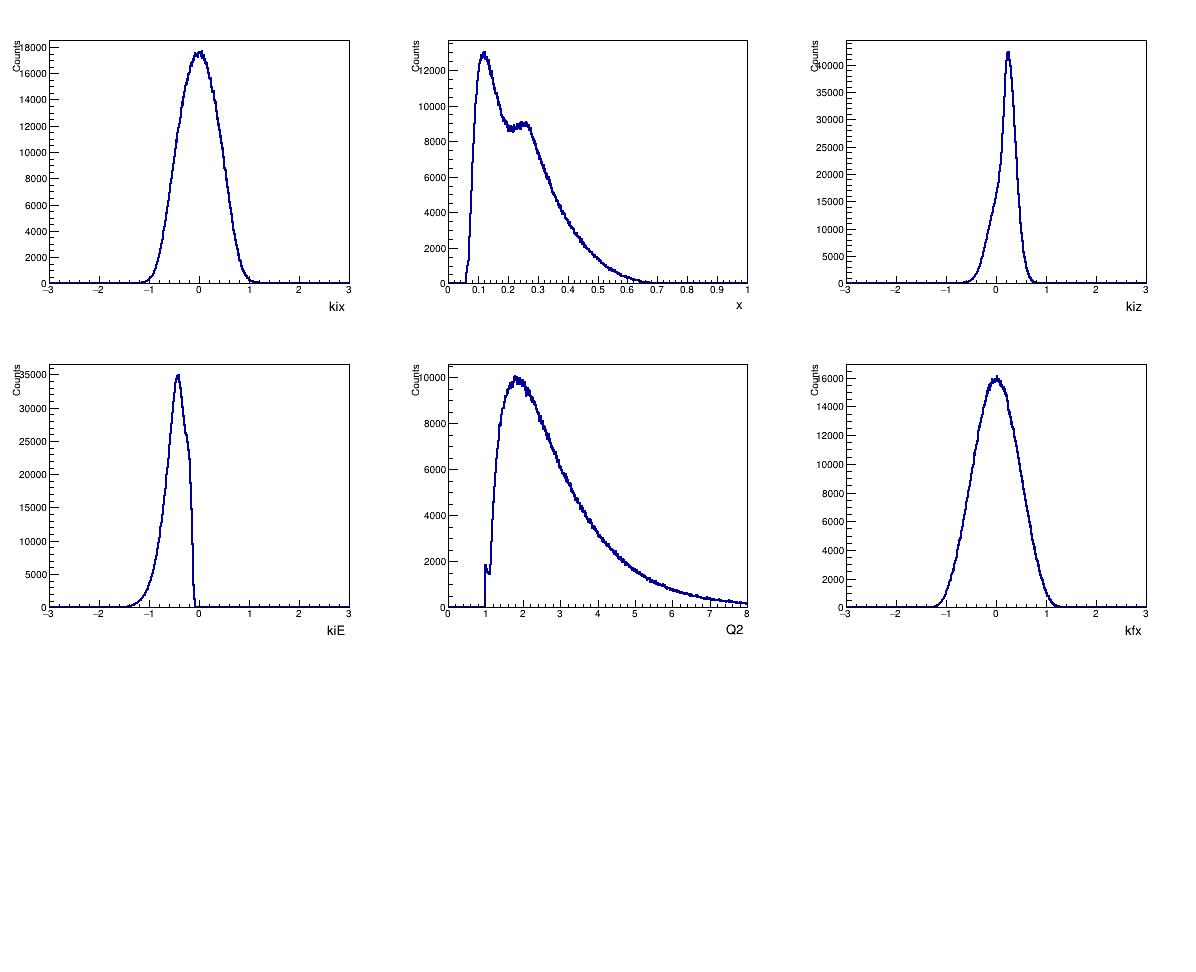

In [51]:
stack = THStack("hs","")
c2 = TCanvas("c","c",1200,1000)
c2.Divide(3,3)
# harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
harray = np.array([g,g1,g2,g3,g4])

c2.cd(1)
g.Draw("histo")
c2.cd(2)
h1.Draw("histo")
c2.cd(3)
g2.Draw("histo")
c2.cd(4)
g3.Draw("histo")
c2.cd(5)
h4.Draw("histo")
c2.cd(6)
g4.Draw("histo")
# c.cd(7)
# h6.Draw("histo")
# c.cd(8)
# h7.Draw("histo")
# c.cd(9)
# h8.Draw("histo")
c2.Draw()
c2.Print("histos.png")